In [1]:
# initial setup
#%run "../../../common/0_notebooks_base_setup.py"


In [2]:
# NOTA: Esta es la forma de armar html con algun contenido dinamico. No borrar porque sirve como ejemplo

# cargo los estilos y la portada:

#css_path = '../../../common/dhds.css'

#raw_html = '<div class="Table">' \
#    '<div class="Row">' \
#        '<div class="Cell grey left"> <img src="' + gs.images_base_url + 'M1/CLASE_02_Python1/Presentacion/img/M1_CLASE_02_portada.png" align="center" /></div>' \
#        '<div class="Cell right">' \
#            '<div class="div-logo"><img src="' + gs.images_base_url + 'common/logo_DH.png" align="center" width=70% /></div>' \
#            '<div class="div-curso">DATA SCIENCE</div>' \
#            '<div class="div-modulo">MÓDULO 1</div>' \
#            '<div class="div-contenido">Entornos (Conda y Jupyter Notebooks) <br/> Repaso de Python</div>' \
#        '</div>' \
#    '</div>' \
#'</div>'        


In [3]:
# importante: tagear como slide to remove y generar por linea de comandos 
#from IPython.display import HTML as html
#html("<link rel='stylesheet' href='" + css_path + "'>" + raw_html)

<link rel="stylesheet" href='../../../common/dhds.css'>
<div class="Table">
    <div class="Row">
        <div class="Cell grey left"> <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_07_Geopandas/Presentacion/img/M1_CLASE_07_portada.PNG" align="center" width=90%/> </div>                
    <div class="Cell right">
            <div class="div-logo"><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/common/logo_DH.png" align="center" width=70% /></div> 
            <div class="div-curso">DATA SCIENCE</div>
            <div class="div-modulo">MÓDULO 1</div>            
            <div class="div-contenido">GeoPandas</div>        
        </div>
    </div>    
</div>        

## Objetivos de la clase

---

- Comprender los GIS (Sistemas de Información Geográfica)

- Conocer los tipos de datos geoespaciales

- Manejar la libreria GeoPandas y sus tipos de datos

- Realizar operaciones con los datos geoespaciales usando GeoPandas

<div class="div-dhds-fondo-1">  GIS (Sistemas de Información Geográfica)
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_05_Pandas1/Presentacion/img/M1_CLASE_05_separador.png" align="center"></img>    
</div>


### Sistemas de Información Geográfica (SIG)

---

Se definen como sistemas que permiten almacenar datos geoespaciales para su consulta, manipulación y representación. La representación de estos datos es el campo de estudio de la *Cartografía*. A partir del trabajo con los SIG, nació una nueva disciplina científica, conocida como *Ciencia de la Información Geográfica*.

<div>
    <div class = "mapa">
        <img src='https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_07_Geopandas/Presentacion/img/M1_Clase_07_1_001_SIG.jpg' alt="Ejemplo de SIG" width=30% height=40% align="center">
    </div>
</div>

El sistema permite separar la información en diferentes capas temáticas, las almacena independientemente, y luego se pueden presentar todas juntas.

<div>
    <div class = "mapa">
        <img src='https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_07_Geopandas/Presentacion/img/M1_Clase_07_1_002_Capas.PNG' alt="Varias capas temáticas" width=40% height=50% align="center">
    </div>
</div>

### Datos Geoespaciales

---

Los **Datos Geoespaciales**, también llamados información geográfica, geodatos o simplemente datos espaciales, son datos georreferenciados. La *georreferenciación* es la técnica de posicionamiento espacial de una entidad en una localización geográfica única y bien definida en un *sistema de coordenadas*.

Los geodatos poseen información *implícita* (cantidad de habitantes, una referencia catastral, una dirección postal, etc.) o *explícita* (coordenadas de ubicación obtenidas a partir de datos capturados mediante GPS, etc.).

### Sistema de coordenadas geográficas

---

Son los sistemas que permiten referenciar un objeto en una posición espacial determinada. El sistema más usual es el WGS 84, que usa las medidas *latitud* y *longitud*.
      
Si consideramos a la Tierra como una esfera (o esferoide), existen dos líneas fundamentales: el *meridiano de Greenwich*, que va de un polo a otro, y el *Ecuador*, que cruza al eje de rotación por el centro de la esfera. Las líneas paralelas al Ecuador se denominan *latitud*, y las lineas paralelas a Greenwich, *longitud*.
      
<div>
    <div class = "mapa">
        <img src='https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_07_Geopandas/Presentacion/img/M1_Clase_07_1_008_Latitud_Longitud.PNG' alt="Latitud y Longitud" width=40% height=30% align="center">
    </div>
</div> 
      
La *latitud* se indica con valores positivos entre 0 y 90 para las líneas al norte del Ecuador, y con valores negativos entre 0 y -90 para las que están al sur. Otra forma de nombrarlas es usando siempre un valor positivo entre 0 y 90, y agregando si corresponde al Norte o al Sur.
      
La *longitud* se indica en forma similar, pero con valores positivos entre 0 y 180 para las líneas al este de Greenwich, y con valores negativos entre 0 y -180 para las que están al oeste. O bien siempre un valor positivo entre 0 y 180, e indicando este u oeste.

<div class="div-dhds-fondo-1">  Tipos de Datos Geoespaciales
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_05_Pandas1/Presentacion/img/M1_CLASE_05_separador.png" align="center"></img>    
</div>

### Tipos de Datos Geoespaciales

---

Existen dos tipos de datos geoespaciales en los Sistemas de Información Geográfica: *raster* y *vectorial*.

### Tipos de Datos Raster

---

El tipo de datos **raster** es lo que consideramos imagenes digitales, o mapas. Se representan mediante mallas o cuadriculas; divide el espacio en celdas regulares donde cada una de ellas representa un único valor. Similar a la fotografía digital donde el píxel es la unidad menor de información de una imagen, y una combinación de estos píxeles crea una imagen. 

Este tipo de datos se centra en las propiedades del espacio, por ejemplo, elevaciones sobre un terreno, nivel de luz, variedad de cultivos. No siendo tan precisos en la localizacion en el espacio.

<div>
    <div class = "mapa">
        <img src='https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_07_Geopandas/Presentacion/img/M1_Clase_07_1_003_Mapa.PNG' alt="Datos tipo raster" width=60% align="center">
    </div>
</div> 

Mapa y mapa pixelado

### Tipos de Datos Vectorial

---

El tipo de datos **vectorial** representan objetos que provienen de diversas fuentes: localidades, negocios, barrios, rutas, nivel de contaminación, etc. Son datos discretos, es decir, con limites definidos. Y con una localizacion precisa sobre el espacio. 

<div>
    <div class = "mapa">
        <img src='https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_07_Geopandas/Presentacion/img/M1_Clase_07_1_005_Vectorial.PNG' alt="Tipo de dato Vectorial" width=30% height=40%>
    </div>
</div>

Para modelar los objetos se utilizan tres formas: el punto, la línea y el polígono.
<div>
    <div class = "mapa">
        <img src='https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_07_Geopandas/Presentacion/img/M1_Clase_07_1_006_Vectorial.PNG' alt="Elementos geométricos" width=30% height=40%>
    </div>
</div>


### Tipos de Datos Vectorial

---

- Los **puntos** se utilizan para las entidades geográficas que mejor pueden ser expresadas por un único punto de referencia. Por ejemplo, estaciones de subte, edificios, localizaciones de los pozos, puntos de interés.
- Las **líneas unidimensionales o polilíneas** son usadas para rasgos lineales como ríos, caminos, ferrocarriles, líneas topográficas o curvas de nivel. En los elementos lineales puede medirse la *distancia*.
- Los **polígonos** se utilizan para representar elementos geográficos que cubren un área particular de la superficie de la tierra. Por ejemplo, lagos, límites de parques naturales, yacimientos, provincias. Con ellos se pueden medir el *perímetro* y el *área*.
<div>
    <div class = "mapa">
        <img src='https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_07_Geopandas/Presentacion/img/M1_Clase_07_1_010_Formas.PNG' alt="Elementos geométricos" width=70% >
    </div>
</div>

### Archivos de Datos Geoespaciales

---

En general, se denomina formato SIG a los formatos de archivos con datos geoespaciales.

Los datos geoespaciales de tipo *raster* se almacenan en los tipos de archivos que conocemos para almacenar imágenes. Por ejemplo, los formatos TIFF, JPEG, PNG, etc. 

Los datos geoespaciales de tipo *vectorial* más comunes son: 

- **SHP (Shapefile).** El archivo shapefile es el tipo de archivo geoespacial más común. Todos los formatos comerciales y de código abierto aceptan shapefile como formatos SIG. Se ha convertido en el estándar de la industria.

- **CSV / GeoCSV.**  CSV (Comma-separated values) representa datos en forma de tabla separados por comas. Es usual encontrarlos en publicaciones de organismos, por ejemplo https://data.buenosaires.gob.ar/dataset. La ventaja es que ocupan poco espacio y es fácil compartirlos. GeoCSV es el mismo formato CSV con una extensión de geometría espacial.

Existen otros tipos de archivos, por ejemplo: GeoJSON (Javascript Object Notation), KMZ/KML (Keyhole Markup Language), OSM (OpenStreetMap), PostGIS + PostgreSQL, etc.

<div class="div-dhds-fondo-1">  GeoPandas
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_05_Pandas1/Presentacion/img/M1_CLASE_05_separador.png" align="center"></img>    
</div>

### GeoPandas

---

**GeoPandas** es una biblioteca que permite trabajar con datos geoespaciales en Python. Para ello, usa las facilidades de otras bibliotecas de Python.

- Extiende la funcionalidad de **pandas**. Es decir que se pueden realizar todas las operaciones que se aplican a las *Series* y *DataFrame*. 

- Provee una interfaz con la libreria **matplotlib** para generar mapas. Las figuras geométricas se pueden mapear facilmente con el método plot().

- Permite operaciones sobre los datos geométricos que representan a los datos espaciales (puntos, líneas y polígonos). Para ello hace uso de la libreria **shapely**.

- Facilita el acceso a datos en múltiples *formatos de archivos*, extendiendo las operaciones que brinda la librería **fiona**.

- Realiza **proyecciones**, es decir, permite usar distintos tipos de coordenadas para referenciar la posición geográfica de los datos geoespaciales.

### GeoSeries y GeoDataFrame

---
Así como *Pandas* tiene como estructura de datos a las *Series* y *Dataframe*, *Geopandas* tiene algo similar llamado *Geoseries* y *GeoDataFrame*.

La diferencia entre ellos es que tanto **GeoSeries** como **GeoDataFrame**, deben contener al menos una columna con tipos de datos geoespaciales. Esta columna se la llama por default *geometry*.

La columna *geometry* contiene una forma geométrica que representa la posición espacial del objeto. Por ejemplo, la posicion espacial de un negocio - sus coordenadas- se expresan mediante la forma geométrica *punto*.

Las formas geométricas son:
- POINT. Un punto
- LINESTRING. Una línea
- POLYGON. Una superficie

También se pueden representar colecciones de formas:

- MULTIPOINT. Varios puntos
- MULTILINESTRING. Varias líneas
- MULTIPOLYGON. Varias superficies

### En Python

Vamos a trabajar con algunos datos geoespaciales con GeoPandas.

* Puntos, que representan un lugar determinado. Como tienen cero dimensiones no se puede medir la longitud ni el área. Un punto puede representar datos abstractos, como una ciudad, en una escala pequeña. A medida que se hace zoom, y se agranda la escala, se transforma en un área, un polígono.

* Líneas, que pueden representar ríos, senderos, calles, etc. Como tienen una dimensión, se puede medir su longitud. Tienen un punto inicial y un punto final. También se usan para representar arcos.

* Polígonos, se utilizan para representar áreas tales como el límite de una ciudad (en un mapa a gran escala), un lago o un bosque. Las características del polígono son bidimensionales y, por lo tanto, se pueden usar para medir el área y el perímetro de una característica geográfica.

### Puntos

---
Con **puntos** vamos a representar locales bailables de Buenos Aires.

Leemos un archivo del tipo de datos *CSV*, y lo transformamos en un DataFrame. Se muestran algunas filas y columnas.

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

In [5]:
df_locales = pd.read_csv("../Data/locales-bailables.csv", encoding='latin1')
#df_locales.loc[:4, ['X', 'Y','NOMBRE','CALLE','NUMERO']]

### Puntos

---
Observar que la posición geoespacial de cada local se representa por la *latitud* (columna Y) y *longitud* (columna X). Son datos *numéricos*.

Pero para generar un GeoDataFrame, necesitamos que una columna contenga una forma geométrica. Es este caso, un *punto*. Es recomendable que la columna se llame *geometry*.

Con el método `gpd.points_from_xy(df_locales.X, df_locales.Y)` lo realizamos.

**IMPORTANTE:** este método tiene dos parámetros, el primero, x, debe recibir la **longitud**, y el segundo, y, la **latitud**. Se puede pensar lógicamente que debe ser a la inversa.

<AxesSubplot:>

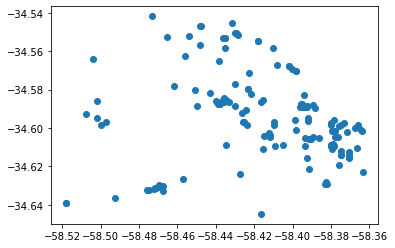

In [7]:
geo_locales = gpd.GeoDataFrame(df_locales
                             ,geometry=gpd.points_from_xy(df_locales.X, df_locales.Y))
geo_locales.plot()
#geo_locales.loc[:4, ['geometry', 'X', 'Y','NOMBRE','CALLE','NUMERO']]

### Polígonos

---

Con **polígonos** vamos a representar los barrios de Buenos Aires.

El archivo barrios.csv es del tipo *GeoCSV*, con el formato habitual para los csv pero con una columna del tipo de datos geoespaciales *WKT*, donde se indican los contornos o límites de cada barrio.

Pero la variable barrios generada a partir de la lectura del archivo es un *DataFrame, NO un GeoDataFrame*. Se debe transformar.

<AxesSubplot:>

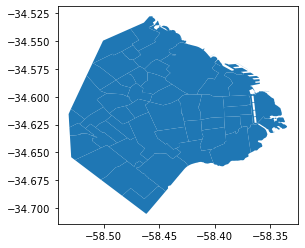

In [20]:
barrios = gpd.read_file("../Data/barrios.csv", encoding='latin1')
barrios.head()
barrios.plot()

In [8]:
type(barrios)

pandas.core.frame.DataFrame

### Polígonos

---

Para convertir de DataFrame a GeoDataFrame a *barrios*, debemos transformar la columna WKT en una columna del tipo *geometry*, el tipo de datos geoespaciales que requiere GeoDataFrame. Para ello, Geopandas usa la libreria **shapely**.

In [15]:
import shapely.wkt
barrios["WKT"] = barrios["WKT"].apply(shapely.wkt.loads) 
geo_barrios = gpd.GeoDataFrame(barrios, geometry='WKT')
type(geo_barrios)
geo_barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA
0,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",ALMAGRO,5.0,8537.901368,4.050752e+06


<AxesSubplot:>

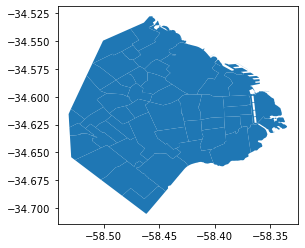

In [12]:
geo_barrios.plot()

### Líneas

---

Las **líneas** se realizan a partir de dos puntos. 

Por ejemplo, generemos una línea entre el edificio de Digital House y el local bailable "AFRIKA". 

Cada lugar debe ser representado por una forma geométrica *punto*. Para lo cual necesitamos su latitud y longitud.

Se usa la libreria `shapely` para generar el tipo de datos Point.

Observar que para definir el tipo *punto*, primero se ingresa la **longitud** y luego la **latitud**.

In [37]:
from shapely.geometry import Point
punto_dh = Point( -58.443555,-34.548921) # dato geoespacial de DH.
punto_afrika = Point( -58.39239, -34.58843) # dato geoespacial de Afrika
punto_dh.type

'Point'

Y ahora sí creamos la línea entre los dos puntos, usando el método `from shapely.geometry import LineString`.

In [38]:
from shapely.geometry import LineString
linea_a = LineString([punto_dh, punto_afrika])
linea_a.type

'LineString'

### Líneas

---

Y podemos graficar la línea sobre el mapa de barrios de Buenos Aires.

Para ello, se necesita crear un tipo de datos GeoSeries con los dos puntos y la línea.

In [39]:
linea_a_geo = gpd.GeoSeries([punto_dh, punto_afrika, linea_a])

In [30]:
estaciones_subte = gpd.read_file('estacionesdesubte.geojson')

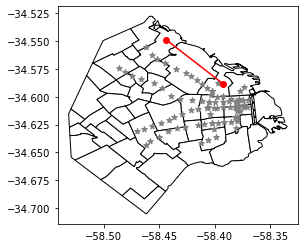

In [40]:
from turtle import color


fig, ax = plt.subplots()
#ax.set_aspect('equal')
geo_barrios.plot(ax=ax, color='white', edgecolor='black')
#geo_locales.plot(ax=ax)
estaciones_subte.plot(ax=ax, color='gray', marker='*')
linea_a_geo.plot(ax=ax, color='red')
plt.show();

<div class="div-dhds-fondo-1"> Operaciones con GeoPandas
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_05_Pandas1/Presentacion/img/M1_CLASE_05_separador.png" align="center"></img>    
</div>

### Operaciones con GeoPandas

---

Es interesante realizar operaciones entre los distintos objetos usando su posición espacial.
Vamos a ver algunas de ellas:

- Determinar si un punto se encuentra dentro de un polígono.
- Dada una línea, conocer qué poligonos atraviesa.
- Calcular la distancia entre dos puntos.

### Determinar si un punto se encuentra dentro de un polígono

---

Con el método `GeoDataFrame.contains` podemos ver si un polígono contiene un punto.

Como ejemplo, veamos si el local bailable *REY CASTRO* se encuentra en el barrio *MONSERRAT*.

Primero generamos dos GeoDataFrame con los datos del barrio y del local bailable, para usar el método plot, para graficarlos.

In [43]:
geo_monserrat = geo_barrios[geo_barrios["BARRIO"]=="MONSERRAT"]
geo_rey_castro = geo_locales[geo_locales['NOMBRE']=='REY CASTRO'] 

In [50]:
type(geo_rey_castro)
geo_rey_castro.head()

,X,Y,NUMERO_REGISTRO,NOMBRE,CALLE,NUMERO,DIRECCION_NORMALIZADA,NUMERO_EXPEDIENTE,CAPACIDAD,CLASE,...,FECHA_DISPOSICION_DE_RECHAZO,NUMERO_DISPOSICION_DE_RECALCULO_CAPACIDAD,FECHA_DISPOSICION_DE_CAPACIDAD,FECHA_DE_ENTREGA_NUEVA_REVALIDA,VENCIMIENTO,BARRIO,COMUNA,CP,CPA,geometry
2,-58.374727,-34.612002,3,REY CASTRO,PERU,342,PERU 342,4407796/18,901 personas,"""C""",...,NaN,67,2006-04-24 00:00:00,2018-05-31,2018-09-03,Monserrat,Comuna 1,1067.0,C1067AAH,POINT (-58.37473 -34.61200)


### Determinar si un punto se encuentra dentro de un polígono

---

Chequeamos visualmente si se encuentra "REY CASTRO" en el barrio "MONSERRAT"

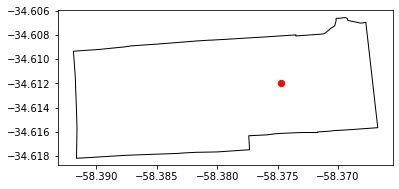

In [48]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_monserrat.plot(ax=ax, color='white', edgecolor='black')
geo_rey_castro.plot(ax=ax, marker='o', color='red', markersize=40)
plt.show();

### Determinar si un punto se encuentra dentro de un polígono

---
Se valida con el método `GeoDataFrame.contains`.

Por un lado, el **polígono** se representa con el GeoDataFrame *geo_monserrat*. Pero el **punto** debe ser construido a partir de los datos del local bailable en el GeoDataFrame geo_locales. 

Porque si usamos el GeoDataFrame *geo_rey_castro*, el método contains da error.

In [54]:
punto_rey_castro = Point(geo_locales[geo_locales['NOMBRE']=='REY CASTRO'].X,
                         geo_locales[geo_locales['NOMBRE']=='REY CASTRO'].Y)

punto_rey = geo_rey_castro['geometry'].iloc[0]

type(punto_rey)

shapely.geometry.point.Point

Aplicando el método `contains` sobre el geoDataFrame, nos devuelve *True*.

In [58]:
geo_barrios.contains(punto_rey_castro)


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42    False
43    False
44    False
45    False
46    False
47    False
dtype: bool

### Dada una línea, conocer qué poligonos atraviesa

---

Pensados como figuras geométricas, una línea puede pasar por varios polígonos.

Como ejemplo, consideremos la linea que realizamos entre el edificio de Digital House y el local bailable "AFRIKA" con el método `linea_a = LineString([punto_dh, punto_afrika])`.

Y analicemos que barrios atraviesa.

El método **crosses** aplicado al GeoDataFrame de los barrios, indica con *True* o *False* si la línea atraviesa o no cada barrio (polígono). 
Observamos que para cada índice del barrio devuelve si pasa o no.

In [60]:
geo_barrios.crosses(linea_a)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33     True
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43     True
44     True
45    False
46    False
47    False
dtype: bool

### Dada una línea, conocer qué poligonos atraviesa

---
Ahora aplicamos el resultado anterior para obtener los barrios por donde pasa.

In [61]:
geo_barrios.loc[geo_barrios.crosses(linea_a), 'BARRIO']

33     PALERMO
43    BELGRANO
44    RECOLETA
Name: BARRIO, dtype: object

### Dada una línea, conocer qué poligonos atraviesa

---

Lo podemos verificar visualmente.

In [63]:
options = ['PALERMO','BELGRANO','RECOLETA'] 
geo_barrios_recorrida = geo_barrios[geo_barrios['BARRIO'].isin(options)] 
geo_barrios_recorrida

,WKT,BARRIO,COMUNA,PERIMETRO,AREA
33,"POLYGON ((-58.42676 -34.55202, -58.42676 -34.5...",PALERMO,14.0,21768.074886,1.577250e+07
43,"POLYGON ((-58.45159 -34.53153, -58.45152 -34.5...",BELGRANO,13.0,21504.197774,7.932303e+06
44,"POLYGON ((-58.39521 -34.57219, -58.39482 -34.5...",RECOLETA,2.0,21246.611702,6.140873e+06


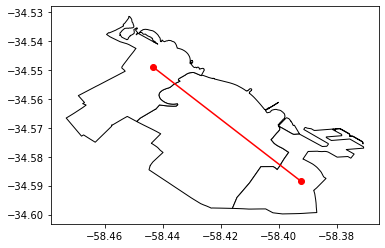

In [64]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_barrios_recorrida.plot(ax=ax, color='white', edgecolor='black')
linea_a_geo.plot(ax=ax, color='red')
plt.show();

### Calcular la distancia entre dos puntos

---

Ahora que sabemos como trazar líneas entre dos puntos, es razonable preguntarse cual es la distancia entre ellos. 

Vamos a calcular la *distancia* entre la ubicación de Digital House y el local bailable "AFRIKA".

Generamos un punto que identifique la posición geoespacial de cada lugar. Observar que para definir la latitud y longitud de cada lugar, la libreria **geopy** necesita que se exprese como una **tupla**.

In [65]:
punto_dh_t = ( -58.443555,-34.548921) # dato geoespacial de DH
punto_afrika_t = ( -58.39239, -34.58843) # dato geoespacial de Afrika

In [25]:
type(punto_dh_t)

tuple

### Calcular la distancia entre dos puntos

---

Para calcular distancias entre dos puntos, usamos <code>import geopy.distance</code>.

Observar que el resultado se puede expresar en diferentes unidades de medida: meters, kilometers, miles.

In [67]:
import geopy
import geopy.distance as distance
dist = geopy.distance.geodesic(punto_dh_t,punto_afrika_t)
dist.meters

6149.000030999573

In [68]:
dist.kilometers

6.149000030999573

<div class="div-dhds-fondo-1"> Hands-on
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_05_Pandas1/Presentacion/img/M1_CLASE_05_separador.png" align="center"></img>    
</div>

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_07_Geopandas/Presentacion/img/M1_Clase_07_warning.png" width ="50%" />

Para esta clase vamos a usar un ambiente nuevo `dhdsblend2021_geopandas`

Las instrucciones para crear el ambiente `dhdsblend2021_geopandas` son las siguientes:

```
conda create --yes --name dhdsblend2021_geopandas python=3.7

conda activate dhdsblend2021_geopandas

conda install jupyterlab=2.2.6

conda install -c conda-forge pyproj=2.4.2.post1

conda install -c conda-forge descartes=1.1.0

conda install -c conda-forge geopandas=0.8.1

conda install -c conda-forge geopy=2.0.0

```


Una vez instaladas las bibliotecas, cerramos jupyter lab, y volvemos a iniciarlo desde el ambiente recién creado: dhdsblend2021_geopandas

En este <a href="https://github.com/Digital-House-DATA/ds_blend_2021_img/wiki/Geopandas-----Fixes" target="_blank">enlace</a> pueden encontrar algunos de los problemas que tuvieron otras comisisones en la instalación de dependencias y sus soluciones.



Después de ejecutar todos los pasos anteriores, estos import deberán funcionar sin dar error.


In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj


### Ejercicio

Representar ciudades de Colombia sobre el mapa del país. Y luego generar una línea entre las ciudades de Bogotá y Barranquilla.

Usar este código para generar el DataFrame de las ciudades:

In [29]:
df_ciudad = pd.DataFrame(
    {'Ciudad': ['Bogota','Cali', 'Medellin', 'Barranquilla'],
     'Latitud': [4.60971, 3.43722, 6.25184, 10.96854],
     'Longitud': [-74.08175, -76.5225, -75.56359, -74.78132]})

Llevar la latitud y longitud a una forma geométrica de Punto, y junto a los datos del DataFrame df_ciudad, generar el GeoDataFrame geo_ciudad.

Que tipo de datos tiene la nueva columna *geometry*?

Usar este código para leer el polígono que representa al contorno de Colombia:

In [30]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_colombia = world[world.name=='Colombia']
geo_colombia

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."


Que tipo de datos es geo_colombia?

En que columna se encuentra representado el polígono?

Usando la funcion graficar, generar un grafico de las ciudades sobre el mapa del pais.

In [31]:
def graficar(p_ciudad, p_pais):
    """Grafica ciudades sobre el mapa del pais"""
    
    ax = p_pais.plot(color='white', edgecolor='black')

    # Sobre las ciudades superpone el mapa del país
    p_ciudad.plot(ax=ax, color='red')

plt.show()

Crear una línea entre las ciudades de Bogotá y Barranquilla.

### Solución

----

### Ejercicio

Representar ciudades de Colombia sobre el mapa del país. Y luego generar una línea entre las ciudades de Bogotá y Barranquilla.

Usar este código para generar el DataFrame de las ciudades:

In [32]:
df_ciudad = pd.DataFrame(
    {'Ciudad': ['Bogota','Cali', 'Medellin', 'Barranquilla'],
     'Latitud': [4.60971, 3.43722, 6.25184, 10.96854],
     'Longitud': [-74.08175, -76.5225, -75.56359, -74.78132]})

Llevar la latitud y longitud a una forma geométrica de Punto, y junto a los datos del DataFrame df_ciudad, generar el GeoDataFrame geo_ciudad.

Con el método `gpd.points_from_xy(df_locales.X, df_locales.Y)` lo realizamos.

**IMPORTANTE:** este método tiene dos parámetros, el primero, x, debe recibir la **longitud**, y el segundo, y, la **latitud**. Se puede pensar lógicamente que debe ser a la inversa.

In [33]:
geo_ciudad = gpd.GeoDataFrame(df_ciudad
                           ,geometry=gpd.points_from_xy(df_ciudad.Longitud, df_ciudad.Latitud))
geo_ciudad

,Ciudad,Latitud,Longitud,geometry
0,Bogota,4.60971,-74.08175,POINT (-74.08175 4.60971)
1,Cali,3.43722,-76.52250,POINT (-76.52250 3.43722)
2,Medellin,6.25184,-75.56359,POINT (-75.56359 6.25184)
3,Barranquilla,10.96854,-74.78132,POINT (-74.78132 10.96854)


Que tipo de datos tiene la nueva columna *geometry*? **geometry**

In [34]:
geo_ciudad.dtypes

Ciudad        object
Latitud      float64
Longitud     float64
geometry    geometry
dtype: object

Usar este código para leer el polígono que representa al contorno de Colombia:

In [35]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_colombia = world[world.name=='Colombia']
geo_colombia

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."


Que tipo de datos es geo_colombia? **GeoDataFrame**

In [36]:
type(geo_colombia)

geopandas.geodataframe.GeoDataFrame

En que columna se encuentra representado el polígono? la columna **geometry**

In [37]:
geo_colombia.dtypes

pop_est          int64
continent       object
name            object
iso_a3          object
gdp_md_est     float64
geometry      geometry
dtype: object

Usando la funcion graficar, generar un grafico de las ciudades sobre el mapa del pais.

In [38]:
def graficar(p_ciudad, p_pais):
    """Grafica ciudades sobre el mapa del pais"""
    
    ax = p_pais.plot(color='white', edgecolor='black')

    # Sobre las ciudades superpone el mapa del país
    p_ciudad.plot(ax=ax, color='red')

plt.show()

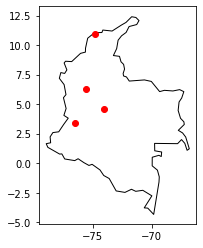

In [39]:
graficar(geo_ciudad, geo_colombia)

Crear una línea entre las ciudades de Bogotá y Barranquilla.

Las **líneas** se realizan a partir de dos puntos. 

Cada lugar debe ser representado por una forma geométrica *punto*. Para lo cual necesitamos su latitud y longitud.

Observar que para definir el tipo *punto*, primero se ingresa la **longitud** y luego la **latitud**.

In [40]:
geo_ciudad

,Ciudad,Latitud,Longitud,geometry
0,Bogota,4.60971,-74.08175,POINT (-74.08175 4.60971)
1,Cali,3.43722,-76.52250,POINT (-76.52250 3.43722)
2,Medellin,6.25184,-75.56359,POINT (-75.56359 6.25184)
3,Barranquilla,10.96854,-74.78132,POINT (-74.78132 10.96854)


In [41]:
from shapely.geometry import Point
punto_bogota = Point( -74.08175,4.60971)
punto_barranquilla = Point( -74.78132, 10.96854)

Y ahora sí creamos la línea entre los dos puntos, usando el método `from shapely.geometry import LineString`.

In [42]:
from shapely.geometry import LineString
linea = LineString([punto_bogota, punto_barranquilla])
linea.type

'LineString'

- Extra

Graficar la línea sobre el mapa de Colombia.

Para ello, se necesita crear un tipo de datos GeoSeries con los dos puntos y la línea.

In [43]:
linea_geo = gpd.GeoSeries([punto_bogota, punto_barranquilla, linea])

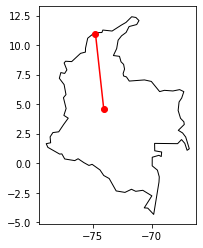

In [44]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_colombia.plot(ax=ax, color='white', edgecolor='black')
linea_geo.plot(ax=ax, color='red')
plt.show();

<div class="div-dhds-fondo-1"> Referencias y Material Adicional
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_05_Pandas1/Presentacion/img/M1_CLASE_05_separador.png" align="center"></img>    
</div>

### Referencias y Material Adicional

---


<a href="https://www.esri.cl/es-cl/que-es-el-gis/que-es-gis" target="_blank" > Que es GIS? </a>

<a href="https://www.um.es/geograf/sigmur/sigpdf/temario.pdf" target="_blank" > Sistemas de Información Geográfica</a>

<a href="https://mappinggis.com/2013/11/los-formatos-gis-vectoriales-mas-populares" target="_blank" > Formatos SIG</a>

<a href="https://geopandas.org" target="_blank" >Geopandas Documentacion</a>
    
<a href="https://www.martinalarcon.org/2018-12-31-d-geopandas
" target="_blank" > The GeoPandas Cookbook</a>

<a href="https://shapely.readthedocs.io/en/stable/manual.html" target="_blank" > The Shapely User Manual</a>
